In [2]:
from __future__ import print_function
import numpy as np
import cv2
import matplotlib.pyplot as plt

import argparse


  

In [3]:
img=cv2.imread("LicensePlate.jpg")

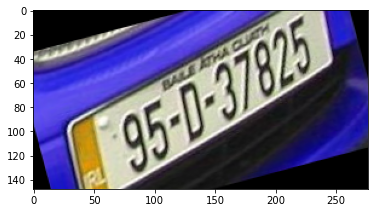

In [4]:
#rotate by 15 degree
image_center = tuple(np.array(img.shape[1::-1]) / 2)
rot_mat = cv2.getRotationMatrix2D(image_center, 15, 1.0)
result = cv2.warpAffine(img, rot_mat, img.shape[1::-1], flags=cv2.INTER_LINEAR)
plt.imshow(result)
plt.show()

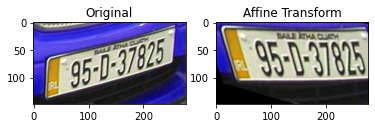

In [34]:
#affine transformm
rows, cols, ch = img.shape 
  
rts1 = np.float32([[50, 90], 
                   [200, 50],  
                   [50, 200]]) 
  
rts2 = np.float32([[50, 50], 
                   [220, 50],  
                   [100, 200]]) 
  
M = cv2.getAffineTransform(rts1, rts2) 
dst1 = cv2.warpAffine(img, M, (cols, rows)) 
  
plt.subplot(121) 
plt.imshow(img) 
plt.title('Original') 
  
plt.subplot(122) 
plt.imshow(dst1) 
plt.title('Affine Transform') 
plt.show()

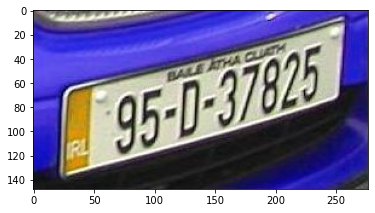

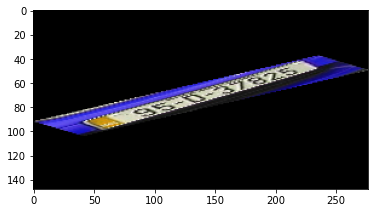

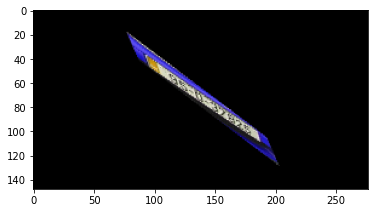

In [5]:

src=img
srcTri = np.array( [[0, 0], [src.shape[1] - 1, 0], [0, src.shape[0] - 1]] ).astype(np.float32)
dstTri = np.array( [[0, src.shape[1]*0.33], [src.shape[1]*0.85, src.shape[0]*0.25], [src.shape[1]*0.15, src.shape[0]*0.7]] ).astype(np.float32)
warp_mat = cv2.getAffineTransform(srcTri, dstTri)
warp_dst = cv2.warpAffine(src, warp_mat, (src.shape[1], src.shape[0]))
# Rotating the image after Warp
center = (warp_dst.shape[1]//2, warp_dst.shape[0]//2)
angle = -50
scale = 0.6
rot_mat = cv2.getRotationMatrix2D( center, angle, scale )
warp_rotate_dst = cv2.warpAffine(warp_dst, rot_mat, (warp_dst.shape[1], warp_dst.shape[0]))
plt.imshow(src)
plt.show()
plt.imshow(warp_dst)
plt.show()
plt.imshow(warp_rotate_dst)


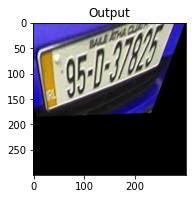

In [42]:
#perspective transform
pts1 = np.float32([[60,60],
                   [300,50],
                   [20,300],
                   [600,390]])

pts2 = np.float32([[50,50],
                   [300,50],
                   [50,300],
                   [300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))


plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

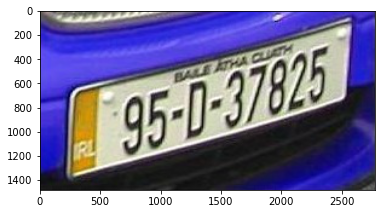

In [11]:
near_img = cv2.resize(img,None, fx = 10, fy = 10, interpolation = cv2.INTER_NEAREST)
plt.imshow(near_img)
plt.show()

Resized Dimensions :  (1480, 2770, 3)
Original Dimensions :  (148, 277, 3)


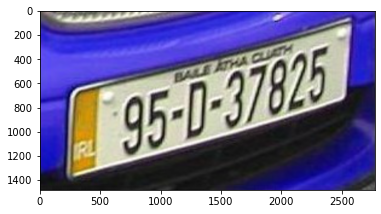

In [29]:
bilinear_img = cv2.resize(img,None,fx = 10, fy = 10 ,interpolation = cv2.INTER_LINEAR)
print('Resized Dimensions : ',bilinear_img.shape)
print('Original Dimensions : ',img.shape)
plt.imshow(bilinear_img)
plt.show()

Resized Dimensions :  (1480, 2770, 3)
Original Dimensions :  (148, 277, 3)


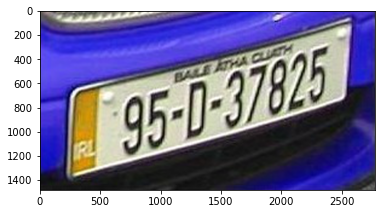

In [28]:
bicubic_img = cv2.resize(img,None, fx = 10, fy = 10, interpolation = cv2.INTER_CUBIC)
print('Resized Dimensions : ',bicubic_img.shape)
print('Original Dimensions : ',img.shape)
plt.imshow(bicubic_img)
plt.show()